#### [PPGCC / LADESC] MDA 2024
##### Aprendizagem de transferência (TL - Transfer Learning) e Adaptação de Domínio

##### Introdução

Neste tutorial, abordaremos:

- Contexto(s) de aprendizagem de transferência
- Aproveitamento de modelos pré-treinados
- Adaptação de domínio não supervisionada

##### Lembretes da teoria

##### O contexto de aprendizagem supervisionada

Temos um conjunto de dados rotulado de $N$ amostras rotuladas: $\left\{ (\vec{x}^i,y^i) \right\}_{i=1}^N$, onde
- $\vec{x}^i = \left(x^i_1, \dots, x^i_D\right) \in \mathcal{X}$ é uma **amostra** ou **vetor de características**.
- $y^i \in \mathcal{Y}$ é o **rótulo**.
- Para classificação com $C$ classes, $\mathcal{Y} = \{0,\dots,C-1\}$, então cada $y^i$ é um **rótulo de classe**.
- Normalmente, assumimos que cada amostra rotulada $(\vec{x}^i,y^i)$
é extraída de uma distribuição conjunta
$$P(X|Y)=P(X)\cdot P(Y|X)$$
- Assumimos que alguma distribuição marginal de amostra $P(X)$ existe.
- Queremos aprender $P(Y|X)$ a partir dos dados.

Até agora, consideramos principalmente a configuração tradicional de **aprendizado supervisionado**:

Assumimos que os conjuntos de **treinamento** e **teste** (que supostamente representam dados futuros não vistos)
são ambos da mesma **distribuição** e ambos rotulados.

Conseguimos assumir isso porque queríamos resolver uma tarefa com um conjunto de dados e poderíamos
portanto, dividir nosso conjunto de dados em tais conjuntos.

O que acontece quando esse não é o caso?

##### Transfer learning (Aprendizagem de transferência)

No mundo real, muitas vezes não temos o conjunto de treinamento perfeito para o nosso problema.

O que devemos fazer quando a suposição de aprendizado supervisionado é inválida?

<img src="./img/transfer_learning_digits.png" width="700"/>

##### Domínios e tarefas

Vamos começar com algumas definições para explicar o problema.

- Imagine que temos um **espaço de características**, $\mathcal{X}$
- Por exemplo, $\mathcal{X}$ é o espaço de imagens coloridas de tamanho 32x32, cada pixel no intervalo de 0-255

In [2]:
import math
# tamanho deste espaço de recurso "limitado"
print(f'10^{math.log10(256**(32**2*3))}')

10^7398.1131734380015


- Como de costume, temos um conjunto de treinamento $X=\{\vec{x}^{(i)}\}_{i=1}^{N},\ \vec{x}^{(i)}\in\mathcal{X}$.
- Por exemplo, CIFAR-10

<img src="img/cifar10.png" width="700"/>

- Existe alguma **distribuição de probabilidade** $P(X)$ (também conhecida como $P_{X}(\vec{x})$) sobre nosso conjunto de treinamento.
    - Note que não nos importamos com a distribuição sobre $\mathcal{X}$.
    - Por exemplo, se $X$ for CIFAR-10, a probabilidade de uma imagem toda preta deve ser muito baixa
    - Se as classes forem desbalanceadas, probabilidades muito diferentes para membros de classes grandes e pequenas

    <img src="img/data_dist.jpg" width="800"/>

- Nosso **espaço de rótulos**, $\mathcal{Y}$ inclui os rótulos possíveis para amostra em nosso problema.
    - Por exemplo $\mathcal{Y}=\{0,1\}$ em classificação binária.
    - Podemos ter também $Y = \{y^{(i)}\}_{i=1}^{N}$, o conjunto de rótulos para nosso conjunto de dados.

- Queremos aprender a função alvo $\hat{y}=f(\vec{x})$ que prevê um rótulo dada uma imagem.
    - Da perspectiva probabilística, aprenda $P(\hat{y}|\vec{x})$.

- Finalmente,
    - Um **domínio** de aprendizagem $\mathcal{D}$, é definido como $\mathcal{D}=\left\{\mathcal{X},P(X)\right\}$.
    - Uma **tarefa** de aprendizagem $\mathcal{T}$ é definida como $\mathcal{T}=\{\mathcal{Y},P(Y|X)\}$.

##### Configurações do Transfer Learning

**Definição** (Pan & Yang, 2010):

Dado
- Um domínio de **origem** $\mathcal{D}_S$ (source) e a tarefa de aprendizagem $\mathcal{T}_S$
- Um domínio de **alvo** $\mathcal{D}_T$ (target) e a tarefa de aprendizagem $\mathcal{T}_T$

*A aprendizagem por transferência* visa melhorar a aprendizagem da função alvo
usando *conhecimento* em $\mathcal{D}_S$ e $\mathcal{T}_S$, quando
- $\mathcal{D}_S \neq \mathcal{D}_T$, ou
- $\mathcal{T}_S \neq \mathcal{T}_T$

Normalmente também há outras restrições no domínio alvo, como poucos ou nenhum rótulo disponível.

Quando $\mathcal{D}_S=\mathcal{D}_T$ e $\mathcal{T}_S=\mathcal{T}_T$ estamos no cenário regular de aprendizado supervisionado
que vimos até agora.

Por exemplo, dividindo o CIFAR-10 aleatoriamente em um conjunto de treinamento e teste.

##### Mesmo domínio, tarefa diferente

Lembre-se, uma **tarefa** de aprendizado $\mathcal{T}$ é definida como $\mathcal{T}=\{\mathcal{Y},P(Y|X)\}$.

Então há dois casos (não mutuamente exclusivos).

Caso 1: Os espaços de rótulo são diferentes, $\mathcal{Y}_S \neq \mathcal{Y}_T$

Por exemplo, o domínio alvo tem mais classes.

<img src="img/cifar10_100.png" width="900"/>

Caso 2: As distribuições condicionais do alvo são diferentes, $P(Y_S|X_S)\neq P(Y_T|X_T)$.

Este pode ser o caso quando o equilíbrio de classe é muito diferente nas distribuições de origem e de destino.

##### Mesma tarefa, domínio diferente

Lembre-se, um **domínio** de aprendizagem $\mathcal{D}$, é definido como $\mathcal{D}=\left\{\mathcal{X},P(X)\right\}$.

Novamente, dois casos.

Caso 1: Diferentes espaços de características, $\mathcal{X}_S \neq \mathcal{X}_T$.

Por exemplo: $\mathcal{X}_S$ é um espaço de imagens em tons de cinza enquanto $\mathcal{X}_T$ é um espaço de imagens coloridas;
documentos em diferentes idiomas.

Caso 2: Distribuições de dados diferentes, $P(X_S)\neq P(X_T)$.

Por exemplo: o domínio de origem contém imagens desenhadas à mão, enquanto o domínio de destino contém fotografias;
documentos no mesmo idioma sobre tópicos diferentes.

<img src="img/tl_example.png" width="400"/>

Este é um cenário muito comum e geralmente chamado de **adaptação de domínio**.

TL é um campo de pesquisa enorme, divido em:

<img src="img/pan_yang.png" width="1000" />

Neste tutorial, veremos dois exemplos simples, mas comuns.

##### Parte 1: Ajuste fino de um modelo pré-treinado

Nós treinamos um modelo em um domínio de origem,
e agora queremos usá-lo para acelerar o treinamento para um domínio diferente.

Em algumas aplicações, podemos ter muito menos dados rotulados no domínio alvo, tornando inviável treinar um modelo profundo do zero.

Exemplo comum: pré-treinar no ImageNet (1M+ imagens, 1000 classes) e então classificar, por exemplo, imagens médicas.

<img src="img/transfer-learning-medical.png" width="700" />

Por que isso funcionaria?

CNNs capturam características hierárquicas, com camadas mais profundas capturando características de nível superior e específicas de classe
(Zeiler & Fergus, 2013).

<img src="img/zf1.png" width="900"/>

<img src="img/zf2.png" width="1400"/>

- Portanto, podemos começar de um modelo pré-treinado e,
    - "Ajustar" os filtros convolucionais, principalmente nas camadas mais profundas.
    - Alterar o classificador (ou removê-lo completamente) para se adequar à nossa tarefa e treiná-lo do zero.

In [ ]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import torch
# remove warnings
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 20
data_dir = os.path.expanduser('D:/Downloads/mda-datasets')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [3]:
import torchvision as tv

# Carregando uma CNN profunda pré-treinada no ImageNet
# Usando ResNet18, para reduzir o tamanho do download, se necessário use algo mais profundo
resnet18 = tv.models.resnet18(pretrained=True)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# Congelando todas as camadas: desabilitar o rastreamento de gradiente
for p in resnet18.parameters():
    p.requires_grad = False

In [5]:
# Descongelando a última camada (ou o que for relevante para você)
for p in resnet18.layer4.parameters():
    p.requires_grad = True

In [6]:
import torch.optim

# Outra maneira de congelar: taxas de aprendizagem zero para parâmetros específicos
opt = torch.optim.SGD([
    dict(params=resnet18.layer1.parameters(), lr=0),
    dict(params=resnet18.layer2.parameters(), lr=0),
    dict(params=resnet18.layer3.parameters(), lr=0),
    dict(params=resnet18.layer4.parameters(), lr=1e-4),
    dict(params=resnet18.fc.parameters()),
], lr=1e-2, momentum=0.9)

In [7]:
import torch.nn as nn

# Substituir a parte totalmente conectada por algum outro classificador, por exemplo:

cnn_features = resnet18.fc.in_features
num_classes = 13

resnet18.fc =  nn.Sequential(
    nn.Linear(cnn_features, 100, bias=True),
    nn.ReLU(),
    nn.Linear(100, num_classes, bias=True),
)

In [8]:
import torchvision.transforms as tvtf

# Importante: precisamos dimensionar nossos dados da mesma forma que os dados de treinamento do ImageNet
tf = tvtf.Compose([
    tvtf.Resize(224),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Carregando os dados do domínio alvo (CIFAR-10 usado apenas como um exemplo simples)
ds_train = tv.datasets.CIFAR10(root=data_dir, download=True, train=True, transform=tf)
ds_test = tv.datasets.CIFAR10(root=data_dir, download=True, train=False, transform=tf)

batch_size = 8
dl_train = torch.utils.data.DataLoader(ds_train, batch_size, shuffle=True, num_workers=2)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
resnet18(ds_train[0][0].unsqueeze(dim=0))

tensor([[-0.0517, -0.1231, -0.0341,  0.2530,  0.3909, -0.2339,  0.5353,  0.1670,
          0.0644, -0.3603,  0.1518, -0.1385, -0.2485]],
       grad_fn=<AddmmBackward0>)

In [10]:
import torch.optim as optim

# Importante: Somente parâmetros que rastreiam gradientes podem ser passados ​​para o otimizador
params_non_frozen = filter(lambda p: p.requires_grad, resnet18.parameters())
opt = optim.SGD(params_non_frozen, lr=0.05, momentum=0.9)

# O ajuste fino geralmente significa que queremos taxas de aprendizado menores do que o normal e
# decaindo-as para continuar melhorando os pesos
lr_sched = optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.05, patience=5,)

loss_fn = nn.CrossEntropyLoss()

def train(model, loss_fn, opt, lr_sched, dl_train, dl_test):
    # Assim como no treinamento regular do classificador, basta chamar lr_scheduler.step() a cada época.
    # ...
    pass

##### Parte 2: Adaptação de domínio não supervisionada

Vamos considerar um problema com domínios diferentes, mas uma tarefa idêntica:

- Domínio de origem: MNIST
- Domínio de destino: MNIST-M, uma versão colorida e texturizada do MNIST

A tarefa em ambos os casos é a classificação usual de 10 dígitos de classe.

<img src="img/mnist_m.png" />

##### Exemplo de UDA com treinamento adversarial
> DANN (Ganin et al. 2015) - Domain-Adversarial Training of Neural Networks

Configuração de DA **Não supervisionado**:

Presumimos que não há **rótulos disponíveis** para o domínio alvo.

Precisamos forçar uma CNN a aprender características das formas dos dígitos apenas, não das distribuições de cores.

A abordagem, (com base em Ganin et al. 2015):

- Treinar um classificador para o **domínio** de uma imagem com base em recursos convolucionais profundos.
    - Tentar maximizar a perda do classificador ```domain classifier``` ao treinar a CNN (**perda de confusão** - $Loss$ $L_D$).
    - Simultaneamente, minimizar a perda de classificação do ```label predictor``` no domínio de origem (**perda de rótulos** - $Loss$ $L_y$). usando os mesmos recursos convolucionais.
- Treinar o classificador de dígitos com dados do domínio de origem e o classificador de domínio com dados de ambos os domínios.

<img src="img/ganin_da.png" width="1400" />

$$
L_{total} = \frac{1}{n} \sum_{i=1}^{n} L_y^i (\theta_f,\theta_y) - \lambda \left( \frac{1}{n} \sum_{i=1}^{n} L_d^i (\theta_f,\theta_d) + \frac{1}{n^\prime} \sum_{i=1}^{n^\prime} L_d^i (\theta_f,\theta_d) \right).
$$

##### Dados de domínio fonte e alvo

Observação: para que o próximo bloco seja executado, você deve [baixar](https://1drv.ms/u/c/1ce6b4820c5c5590/EXf0iwWLDdFPn9pxMxqSPugB9vrtoWygqlEzfJ9ws8vQjw?e=JrIcf2) manualmente o conjunto de dados MNIST-M e descompactá-lo em `data_dir` que você definiu no início deste notebook.

In [11]:
from utils.data import MNISTMDataset

image_size = 28
batch_size = 4

tf_source = tvtf.Compose([
    tvtf.Resize(image_size),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=(0.1307,), std=(0.3081,))
])
tf_target = tvtf.Compose([
    tvtf.Resize(image_size),
    tvtf.ToTensor(),
    tvtf.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

ds_source = tv.datasets.MNIST(root=data_dir, train=True, transform=tf_source, download=True)
dl_source = torch.utils.data.DataLoader(ds_source, batch_size)

ds_target = MNISTMDataset(os.path.join(data_dir, 'mnist_m', 'mnist_m_train'),
                          os.path.join(data_dir, 'mnist_m', 'mnist_m_train_labels.txt'),
                         transform=tf_target)
dl_target = torch.utils.data.DataLoader(ds_target, batch_size)

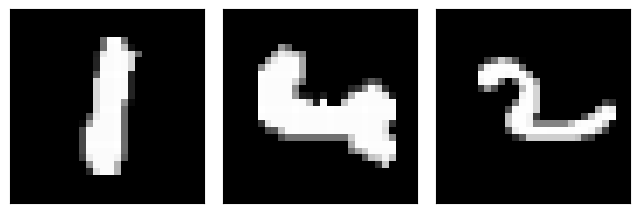

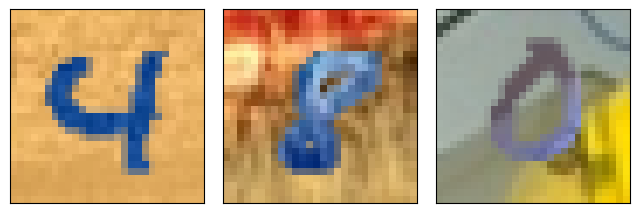

In [12]:
from utils.plots import dataset_first_n

dataset_first_n(ds_source, 3, cmap='gray');
dataset_first_n(ds_target, 3);

##### Modelo

Nosso modelo consistirá em três partes, como na figura:

- Uma CNN "profunda" para extração de características de imagem (2x Conv, ReLU, MaxPool)
- Um classificador de dígitos (3x FC, ReLU)
- Um classificador de domínio (2x FC, ReLU), com uma **camada de reversão de gradiente** (GRL).

<img src="img/ganin_da2.png" width="1400" />

Lembre-se: GRL não é utilizado no forward (passe para a frente), mas aplica-se o fator $-\lambda$ ao gradiente no backward (passe para trás).

Como podemos implementar isso?

In [13]:
from torch.autograd import Function

class GradientReversalFn(Function):
    @staticmethod
    def forward(ctx, x, alpha):        
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        # gradiente reverso
        output = grad_output.neg() * ctx.alpha        
        return output, None

In [14]:
class DACNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5),
            nn.BatchNorm2d(64), nn.MaxPool2d(2),
            nn.ReLU(True),
            nn.Conv2d(64, 50, kernel_size=5),
            nn.BatchNorm2d(50), nn.Dropout2d(), nn.MaxPool2d(2),
            nn.ReLU(True),
        )
        self.class_classifier = nn.Sequential(
            nn.Linear(50 * 4 * 4, 100), nn.BatchNorm1d(100), nn.Dropout2d(),
            nn.ReLU(True),
            nn.Linear(100, 100), nn.BatchNorm1d(100),
            nn.ReLU(True),
            nn.Linear(100, 10),
            nn.LogSoftmax(dim=1),
        )
        self.domain_classifier = nn.Sequential(
            nn.Linear(50 * 4 * 4, 100), nn.BatchNorm1d(100),
            nn.ReLU(True),
            nn.Linear(100, 2),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, x, grl_lambda=1.0):        
        x = x.expand(x.data.shape[0], 3, image_size, image_size)
        
        features = self.feature_extractor(x)
        features = features.view(-1, 50 * 4 * 4)
        reverse_features = GradientReversalFn.apply(features, grl_lambda)
        
        class_pred = self.class_classifier(features)
        domain_pred = self.domain_classifier(reverse_features)
        return class_pred, domain_pred

Por que deixar $\lambda$ (`grl_lambda` no código) mudar durante o treinamento (por exemplo, a cada época)?

- No início do treinamento, a perda de domínio é extremamente ruidosa, pois os recursos da CNN ainda não são bons.
- Portanto, lambda é gradualmente alterado de 0 para 1 no curso do treinamento.
$$
\lambda_p = \frac{2}{1+\exp(-10\cdot p)} -1,
$$
onde $p\in[0,1]$ é o progresso do treinamento.

In [15]:
model = DACNN()

x0_s, y0_s = next(iter(dl_source))
x0_t, y0_t = next(iter(dl_target))

print('source domain: ', x0_s.shape, y0_s.shape)
print('target domain: ', x0_t.shape, y0_t.shape)

model(x0_s)
model(x0_t)

source domain:  torch.Size([4, 1, 28, 28]) torch.Size([4])
target domain:  torch.Size([4, 3, 28, 28]) torch.Size([4])


(tensor([[-3.1019, -2.8803, -1.3769, -1.7143, -2.4222, -2.5921, -2.7698, -2.4844,
          -2.5541, -2.5375],
         [-3.4192, -1.8426, -2.1175, -2.2688, -1.6946, -2.2629, -2.9015, -2.6262,
          -2.5002, -2.4302],
         [-2.0990, -2.3966, -2.0615, -2.3983, -2.3497, -2.6480, -2.3784, -1.7760,
          -2.9630, -2.4259],
         [-2.0230, -2.3446, -2.5302, -1.9031, -2.8394, -2.1098, -2.4986, -2.7489,
          -1.9648, -2.5640]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[-0.8835, -0.5333],
         [-0.5510, -0.8589],
         [-0.7486, -0.6406],
         [-0.7506, -0.6388]], grad_fn=<LogSoftmaxBackward0>))

##### Treinamento

In [16]:
lr = 1e-3
n_epochs = 1

model = DACNN()
optimizer = optim.Adam(model.parameters(), lr)

# Duas funções de perda: uma para classificação e outra para domínio
loss_fn_class = torch.nn.NLLLoss()
loss_fn_domain = torch.nn.NLLLoss()

In [17]:
batch_size = 1024
dl_source = torch.utils.data.DataLoader(ds_source, batch_size)
dl_target = torch.utils.data.DataLoader(ds_target, batch_size)

# Vamos treinar o mesmo número de lotes de ambos os conjuntos de dados
max_batches = min(len(dl_source), len(dl_target))

In [18]:
for epoch_idx in range(n_epochs):
    print(f'Epoch {epoch_idx+1:04d} / {n_epochs:04d}', end='\n=================\n')
    dl_source_iter = iter(dl_source)
    dl_target_iter = iter(dl_target)

    for batch_idx in range(max_batches):
        optimizer.zero_grad()        
        # Progresso do treinamento e lambda GRL
        p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
        grl_lambda = 2. / (1. + np.exp(-10 * p)) - 1

        # Treino do domínio fonte
        X_s, y_s = next(dl_source_iter)
        y_s_domain = torch.zeros(batch_size, dtype=torch.long) # rótulos do domínio fonte

        class_pred, domain_pred = model(X_s, grl_lambda)
        loss_s_label = loss_fn_class(class_pred, y_s)
        loss_s_domain = loss_fn_domain(domain_pred, y_s_domain)

        # Treino do domínio alvo
        X_t, _ = next(dl_target_iter) # ignorando os rótulos
        y_t_domain = torch.ones(batch_size, dtype=torch.long) # rótulos do domínio alvo

        _, domain_pred = model(X_t, grl_lambda)
        loss_t_domain = loss_fn_domain(domain_pred, y_t_domain)
        
        loss = loss_t_domain + loss_s_domain + loss_s_label
        loss.backward()
        optimizer.step()
        
        print(f'[{batch_idx+1}/{max_batches}] '
              f'class_loss: {loss_s_label.item():.4f} ' f's_domain_loss: {loss_s_domain.item():.4f} '
              f't_domain_loss: {loss_t_domain.item():.4f} ' f'grl_lambda: {grl_lambda:.3f} '
             )
        if batch_idx == 20:
            print('Bom, apenas uma demonstração...')
            break

Epoch 0001 / 0001
[1/58] class_loss: 2.3930 s_domain_loss: 0.5917 t_domain_loss: 0.8492 grl_lambda: 0.000 
[2/58] class_loss: 2.2022 s_domain_loss: 0.6275 t_domain_loss: 0.8146 grl_lambda: 0.086 
[3/58] class_loss: 2.0432 s_domain_loss: 0.6475 t_domain_loss: 0.7572 grl_lambda: 0.171 
[4/58] class_loss: 1.9751 s_domain_loss: 0.6730 t_domain_loss: 0.7350 grl_lambda: 0.253 
[5/58] class_loss: 1.8643 s_domain_loss: 0.6947 t_domain_loss: 0.7020 grl_lambda: 0.332 
[6/58] class_loss: 1.7871 s_domain_loss: 0.7108 t_domain_loss: 0.6868 grl_lambda: 0.406 
[7/58] class_loss: 1.7116 s_domain_loss: 0.7169 t_domain_loss: 0.6739 grl_lambda: 0.476 
[8/58] class_loss: 1.6576 s_domain_loss: 0.7133 t_domain_loss: 0.6732 grl_lambda: 0.539 
[9/58] class_loss: 1.6038 s_domain_loss: 0.6966 t_domain_loss: 0.6854 grl_lambda: 0.598 
[10/58] class_loss: 1.4946 s_domain_loss: 0.6816 t_domain_loss: 0.6931 grl_lambda: 0.650 
[11/58] class_loss: 1.4315 s_domain_loss: 0.6682 t_domain_loss: 0.7085 grl_lambda: 0.697 
[

### Visualização dos embeddings

O espaço das features convolucionais aprendidas pelo modelo.

Lembre-se, a perda de confusão de domínio deveria fazer com que as imagens de ambos os domínios parecessem iguais para o classificador.

<img src="img/ganin_da3.png" width="1400"/>

**Créditos de imagens**

Algumas imagens neste tutorial foram tiradas e/ou adaptadas de:

- Pan & Yang, 2010, A Survey on Transfer Learning
- Zeiler & Fergus, 2013, Visualizing and Understanding Convolutional Networks
- Y. Ganin et al. 2015, Unsupervised Domain Adaptation by Backpropagation 
- M. Wulfmeier et al., https://arxiv.org/abs/1703.01461v2
- Sebastian Ruder, http://ruder.io/